In [1]:
library(tidyverse)
library(caret)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [2]:
# pulling in and cleaning the data.
titanicData <-read_csv("titanic.csv")
titanicData <-filter(titanicData,!is.na(survived)& !is.na(fare)& !is.na(age))
titanicData$survived <-as.factor(titanicData$survived)

# Creating training and test datasets
set.seed(1)
training <-sample(1:nrow(titanicData), size =nrow(titanicData)*0.8)
testing <- dplyr::setdiff(1:nrow(titanicData), training)
titanicDataTrain <- titanicData[training, ]
titanicDataTest <- titanicData[testing, ]


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  pclass = col_double(),
  survived = col_double(),
  name = col_character(),
  sex = col_character(),
  age = col_double(),
  sibsp = col_double(),
  parch = col_double(),
  ticket = col_character(),
  fare = col_double(),
  cabin = col_character(),
  embarked = col_character(),
  boat = col_character(),
  body = col_double(),
  home.dest = col_character()
)




In [3]:
print(titanicDataTrain)
summary(titanicDataTrain)

# A tibble: 836 x 14
   pclass survived name      sex     age sibsp parch ticket  fare cabin embarked
    <dbl> <fct>    <chr>     <chr> <dbl> <dbl> <dbl> <chr>  <dbl> <chr> <chr>   
 1      3 0        Vande Wa… male     28     0     0 345770  9.5  NA    S       
 2      3 0        Cribb, M… male     44     0     1 371362 16.1  NA    S       
 3      1 1        Harder, … fema…    25     1     0 11765  55.4  E50   C       
 4      3 1        Persson,… male     25     1     0 347083  7.78 NA    S       
 5      2 0        Norman, … male     28     0     0 218629 13.5  NA    S       
 6      2 1        Beane, M… fema…    19     1     0 2908   26    NA    S       
 7      1 0        White, M… male     54     0     1 35281  77.3  D26   S       
 8      3 0        Attalah,… male     30     0     0 2694    7.22 NA    C       
 9      2 0        Chapman,… fema…    29     1     0 SC/AH… 26    NA    S       
10      1 0        Brady, M… male     41     0     0 113054 30.5  A21   S       
# … wit

     pclass      survived     name               sex           
 Min.   :1.000   0:490    Length:836         Length:836        
 1st Qu.:1.000   1:346    Class :character   Class :character  
 Median :2.000            Mode  :character   Mode  :character  
 Mean   :2.233                                                 
 3rd Qu.:3.000                                                 
 Max.   :3.000                                                 
                                                               
      age              sibsp            parch           ticket         
 Min.   : 0.1667   Min.   :0.0000   Min.   :0.0000   Length:836        
 1st Qu.:21.0000   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median :28.0000   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   :29.3458   Mean   :0.5144   Mean   :0.4246                     
 3rd Qu.:37.0000   3rd Qu.:1.0000   3rd Qu.:1.0000                     
 Max.   :80.0000   Max.   :8.0000   Max.   :6.0000      

In [4]:
# Setting up the train control, in this case we will run a k fold of 10, 3 times
trctrl <- trainControl(method = "repeatedcv", 
                       number = 10, 
                       repeats = 3)

set.seed(2020)

# Using the argument tuneGrid, we will train models using k values of 2 to 30. The data will be normalized using the preprocess argument.
# For this case, we will only use the predictors age and fare.

knn_fit1 <- train(survived ~ ., 
                 data = select(titanicDataTrain, survived, age, fare), 
                 method = "knn", 
                 trControl = trctrl, 
                 preProcess = c("center", "scale"), 
                 tuneGrid = data.frame(k = 2:30))

# Some additional fits using a higher number of predictors. These will just be used to compare against the original fit.

knn_fit2 <- train(survived ~ ., 
                 data = select(titanicDataTrain, survived, age, fare, sex), 
                 method = "knn", 
                 trControl = trctrl, 
                 preProcess = c("center", "scale"), 
                 tuneGrid = data.frame(k = 2:30))

knn_fit3 <- train(survived ~ ., 
                 data = select(titanicDataTrain, survived, age, fare, sex, pclass), 
                 method = "knn", 
                 trControl = trctrl, 
                 preProcess = c("center", "scale"), 
                 tuneGrid = data.frame(k = 2:30))

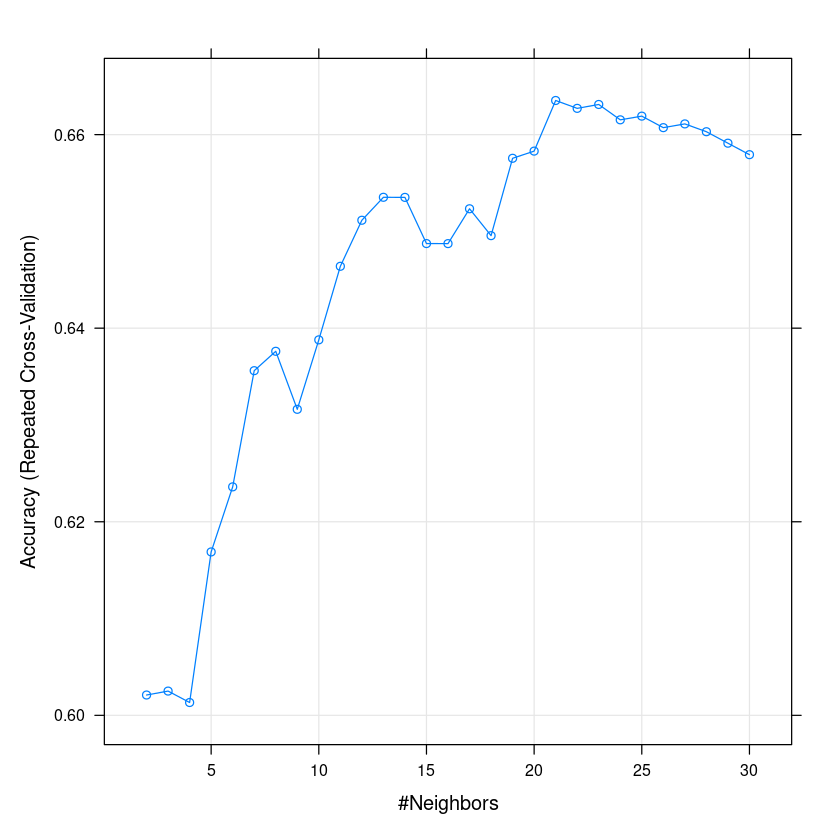

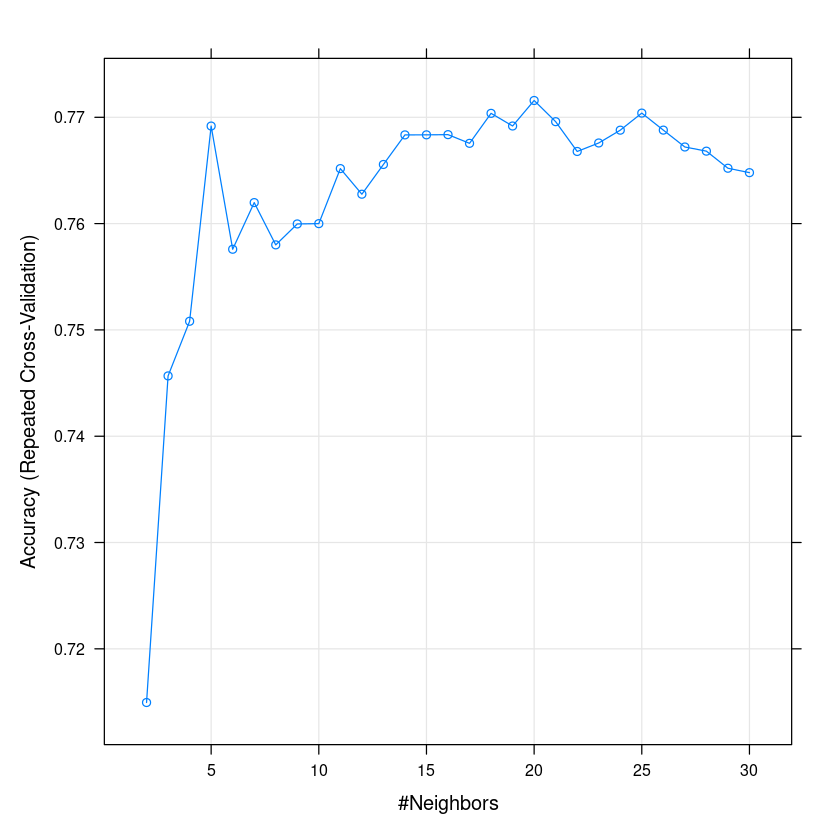

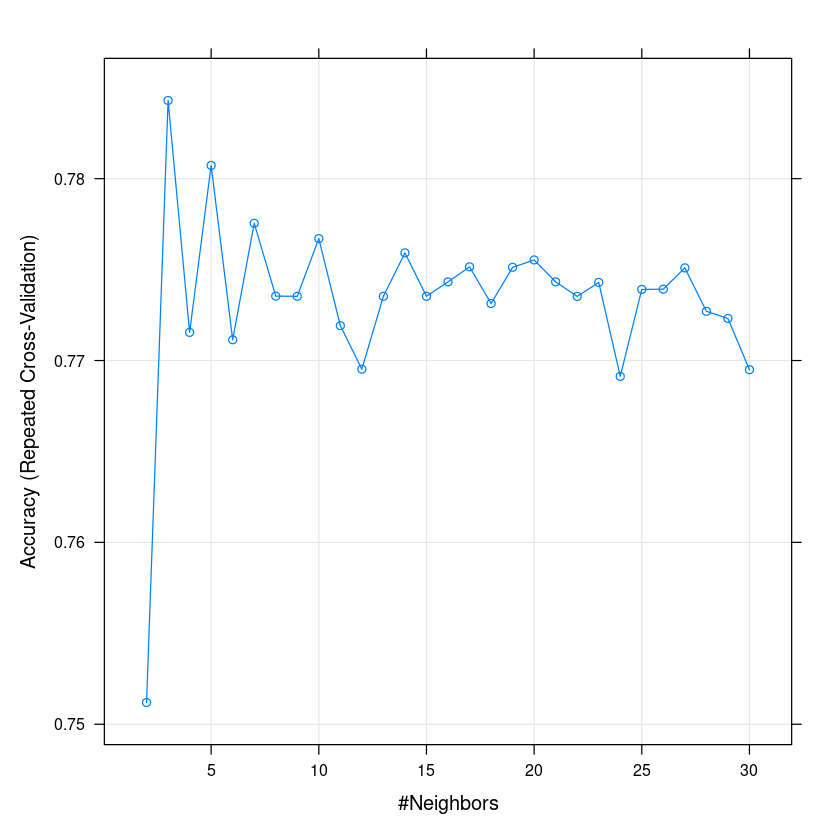

In [5]:
# Plotting the three fits from the previous step, we can see that higher k values are favored to a certain point.
plot(knn_fit1)
plot(knn_fit2)
plot(knn_fit3)

In [6]:
knn_fit1
knn_fit2
knn_fit3

k-Nearest Neighbors 

836 samples
  2 predictor
  2 classes: '0', '1' 

Pre-processing: centered (2), scaled (2) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 752, 753, 752, 752, 752, 753, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   2  0.6020989  0.1807585
   3  0.6025053  0.1711410
   4  0.6013243  0.1633217
   5  0.6168818  0.1916632
   6  0.6236039  0.2052367
   7  0.6356091  0.2286314
   8  0.6376124  0.2308690
   9  0.6316169  0.2150955
  10  0.6387933  0.2316013
  11  0.6463951  0.2463631
  12  0.6511522  0.2551356
  13  0.6535236  0.2592799
  14  0.6535141  0.2582395
  15  0.6487426  0.2478641
  16  0.6487378  0.2448115
  17  0.6523379  0.2515880
  18  0.6495601  0.2451309
  19  0.6575540  0.2627795
  20  0.6582951  0.2628265
  21  0.6635255  0.2749592
  22  0.6627128  0.2720264
  23  0.6631144  0.2731928
  24  0.6615271  0.2673243
  25  0.6619095  0.2690755
  26  0.6607191  0.2656731
  27  0.6611063  0.26

k-Nearest Neighbors 

836 samples
  3 predictor
  2 classes: '0', '1' 

Pre-processing: centered (3), scaled (3) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 753, 752, 752, 753, 752, 752, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   2  0.7149503  0.4098069
   3  0.7456732  0.4733988
   4  0.7508128  0.4830717
   5  0.7691767  0.5206050
   6  0.7575875  0.4979711
   7  0.7619765  0.5054861
   8  0.7579987  0.4961999
   9  0.7599684  0.5003000
  10  0.7599971  0.5013180
  11  0.7651750  0.5123562
  12  0.7627653  0.5083228
  13  0.7655622  0.5151065
  14  0.7683448  0.5207793
  15  0.7683496  0.5214466
  16  0.7683687  0.5215738
  17  0.7675512  0.5198973
  18  0.7703720  0.5252364
  19  0.7691815  0.5222920
  20  0.7715816  0.5275147
  21  0.7695879  0.5228148
  22  0.7667862  0.5166155
  23  0.7675846  0.5185727
  24  0.7687894  0.5211405
  25  0.7703959  0.5242673
  26  0.7687942  0.5211074
  27  0.7672069  0.51

k-Nearest Neighbors 

836 samples
  4 predictor
  2 classes: '0', '1' 

Pre-processing: centered (4), scaled (4) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 752, 752, 752, 753, 753, 752, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   2  0.7511953  0.4865892
   3  0.7842991  0.5503422
   4  0.7715481  0.5249152
   5  0.7807277  0.5418844
   6  0.7711417  0.5224681
   7  0.7775483  0.5328828
   8  0.7735418  0.5244578
   9  0.7735322  0.5232510
  10  0.7767068  0.5298777
  11  0.7719162  0.5178911
  12  0.7695257  0.5120809
  13  0.7735322  0.5195215
  14  0.7759180  0.5239880
  15  0.7735322  0.5180417
  16  0.7743259  0.5192985
  17  0.7751530  0.5211925
  18  0.7731354  0.5167048
  19  0.7751243  0.5195570
  20  0.7755307  0.5209586
  21  0.7743259  0.5178604
  22  0.7735274  0.5169861
  23  0.7742972  0.5180469
  24  0.7691289  0.5075807
  25  0.7739099  0.5170006
  26  0.7739243  0.5176375
  27  0.7750956  0.52

In [10]:
# Run the best knn fit on the test data
knn_pred <- predict(knn_fit1, newdata = titanicDataTest)

# Create a compare set where none one survived
comparator <- sum(rep(0, nrow(titanicDataTest)) != titanicDataTest$survived) / nrow(titanicDataTest)

misclass <- sum(knn_pred != titanicDataTest$survived) / nrow(titanicDataTest)

# As we can see, the knn model using only age and fare did better than just assuming none survived.

print(misclass)
print(comparator)


# Comparing to the other two models, we can see that misclassifications can be reduced by added more information. 
# In this case, sex is a better predictor than class. Class actually increased misclassifications.
misclass2 <- sum(predict(knn_fit2, newdata = titanicDataTest) != titanicDataTest$survived) / nrow(titanicDataTest)
misclass3 <- sum(predict(knn_fit3, newdata = titanicDataTest) != titanicDataTest$survived) / nrow(titanicDataTest)

print(c(misclass2, misclass3))

sprintf("Adding more predictors increased accuracy: %0.3f", 
        c(misclass2, misclass3))

[1] 0.2870813
[1] 0.3875598
[1] 0.2009569 0.2583732


[1] "Adding more predictors increased accuracy: 0.201"
[2] "Adding more predictors increased accuracy: 0.258"

In [8]:
knn_fits <- as_tibble(data.frame(k = 2:30, fit1 = knn_fit1$results[[2]], fit2 = knn_fit2$results[[2]], fit3 = knn_fit3$results[[2]]))

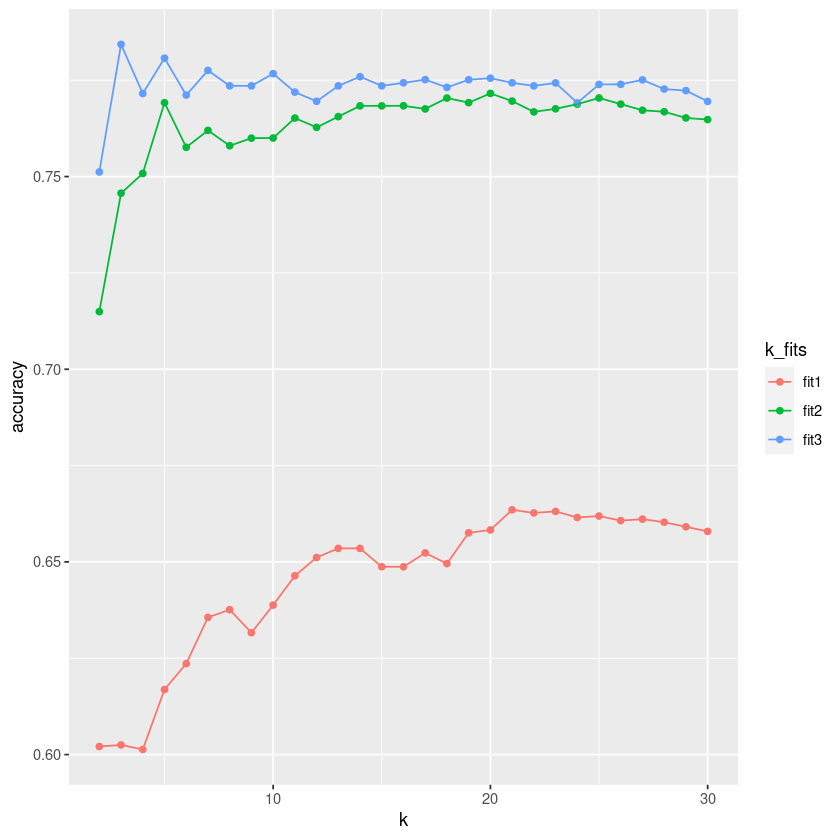

In [9]:
knn_fits %>% gather(key = k_fits, value = accuracy, fit1, fit2, fit3) %>% ggplot(aes(x = k, y = accuracy, col = k_fits)) + geom_point() + geom_line()